In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 

from joblib import Parallel, delayed

# Load Data

In [73]:
lab_desktop = False
if lab_desktop : 
    data_path = '/home/INT/mifsud.l/Bureau/pattern_classification_git/results/'

else : 
    data_path = '/home/laurie/Bureau/pattern_classification_git/results/' 

target = pd.read_csv(data_path + 'target.csv')
spike_convolved = np.load(data_path +  'spike_convolved.npy')
n_trials, n_times, n_neurons = spike_convolved.shape

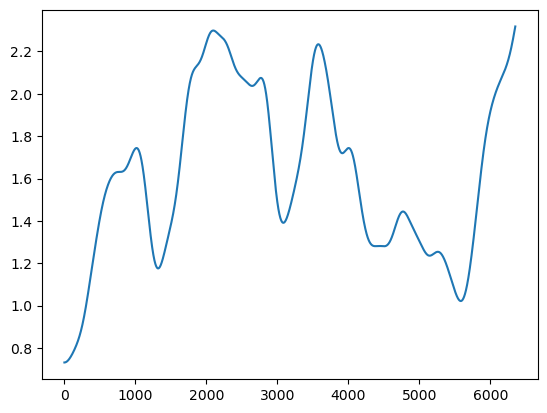

In [8]:
plt.plot(spike_convolved[:, :, 32].mean(axis=0))

In [9]:
target

,Unnamed: 0,trial_type,position,type_and_pos
0,0,1,2,0
1,1,1,2,0
2,2,1,3,1
3,3,1,3,1
4,4,1,4,2
...,...,...,...,...
171,171,1,3,1
172,172,2,3,4
173,173,2,4,5
174,174,2,4,5


# Define the pipeline

In [10]:
# Build pipeline
n_splits = 2
# Cross-validation scheme
cvs0 = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)
# Standardisation scheme
scaler = StandardScaler()
# Algo
estimator = HistGradientBoostingClassifier(max_iter=5, max_depth=10, max_bins=10)
clf = make_pipeline(scaler, estimator)

In [11]:
def classify(X, y):
    if np.isnan(X).any() : 
        return np.nan
    else : 
        return cross_val_score(clf, X.reshape(-1,1), y, cv=cvs0, n_jobs=1).mean() 

# Data exploration

## Trial type

### neuron 0/43 ###
### neuron 1/43 ###
### neuron 2/43 ###
### neuron 3/43 ###
### neuron 4/43 ###
### neuron 5/43 ###
### neuron 6/43 ###
### neuron 7/43 ###
### neuron 8/43 ###
### neuron 9/43 ###
### neuron 10/43 ###
### neuron 11/43 ###
### neuron 12/43 ###
### neuron 13/43 ###
### neuron 14/43 ###
### neuron 15/43 ###
### neuron 16/43 ###
### neuron 17/43 ###
### neuron 18/43 ###
### neuron 19/43 ###
### neuron 20/43 ###
### neuron 21/43 ###
### neuron 22/43 ###
### neuron 23/43 ###
### neuron 24/43 ###
### neuron 25/43 ###
### neuron 26/43 ###
### neuron 27/43 ###
### neuron 28/43 ###
### neuron 29/43 ###
### neuron 30/43 ###
### neuron 31/43 ###
### neuron 32/43 ###
### neuron 33/43 ###
### neuron 34/43 ###
### neuron 35/43 ###
### neuron 36/43 ###
### neuron 37/43 ###
### neuron 38/43 ###
### neuron 39/43 ###
### neuron 40/43 ###
### neuron 41/43 ###
### neuron 42/43 ###


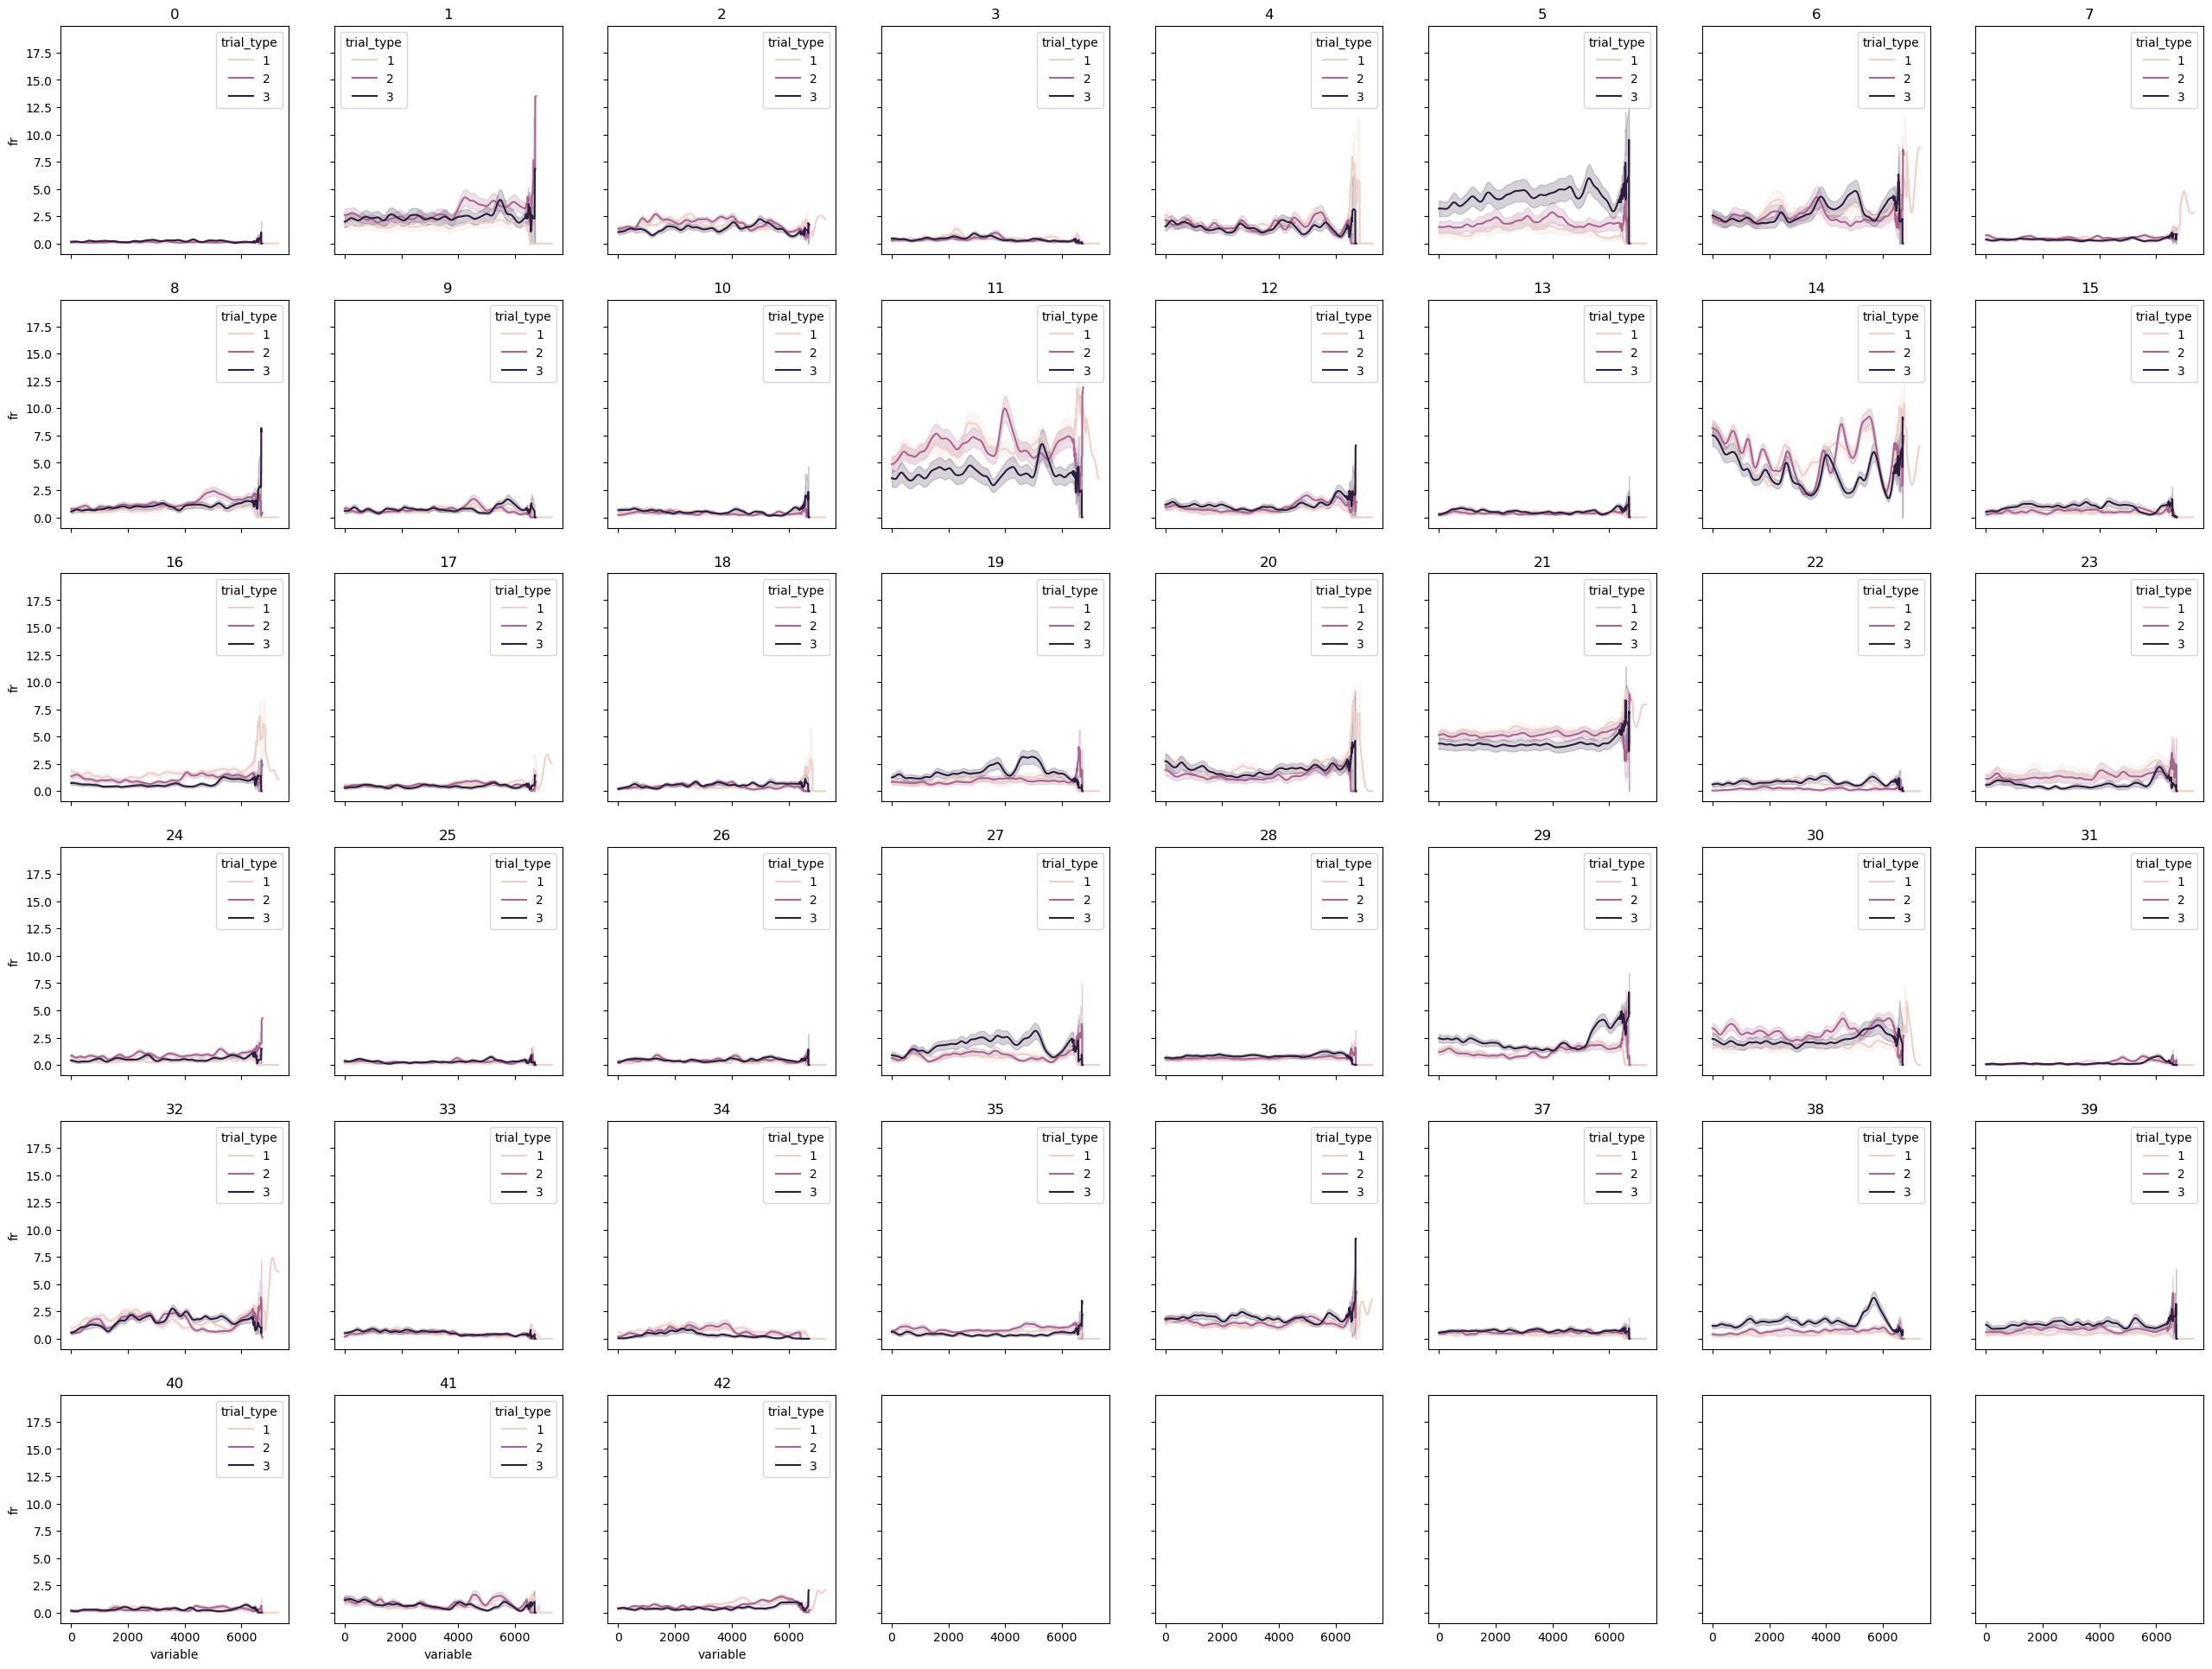

In [88]:
fig, axs = plt.subplots(6,8, figsize=(32,24), sharex=True, sharey=True)

axs = np.ravel(axs)

for n in range(n_neurons):
    print(f'### neuron {n}/{n_neurons} ###')
    plt.sca(axs[n])
    plt.title(n)
    df = pd.DataFrame(spike_convolved[:,:,n], index=target['trial_type'])
    df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
    sns.lineplot(
        data=df_ex, 
        x='variable', 
        y='fr', 
        hue = 'trial_type',
        errorbar='se'
    )

## Position

### neuron 0/43 ###
### neuron 1/43 ###
### neuron 2/43 ###
### neuron 3/43 ###
### neuron 4/43 ###
### neuron 5/43 ###
### neuron 6/43 ###
### neuron 7/43 ###
### neuron 8/43 ###
### neuron 9/43 ###
### neuron 10/43 ###
### neuron 11/43 ###
### neuron 12/43 ###
### neuron 13/43 ###
### neuron 14/43 ###
### neuron 15/43 ###
### neuron 16/43 ###
### neuron 17/43 ###
### neuron 18/43 ###
### neuron 19/43 ###
### neuron 20/43 ###
### neuron 21/43 ###
### neuron 22/43 ###
### neuron 23/43 ###
### neuron 24/43 ###
### neuron 25/43 ###
### neuron 26/43 ###
### neuron 27/43 ###
### neuron 28/43 ###
### neuron 29/43 ###
### neuron 30/43 ###
### neuron 31/43 ###
### neuron 32/43 ###
### neuron 33/43 ###
### neuron 34/43 ###
### neuron 35/43 ###
### neuron 36/43 ###
### neuron 37/43 ###
### neuron 38/43 ###
### neuron 39/43 ###
### neuron 40/43 ###
### neuron 41/43 ###
### neuron 42/43 ###


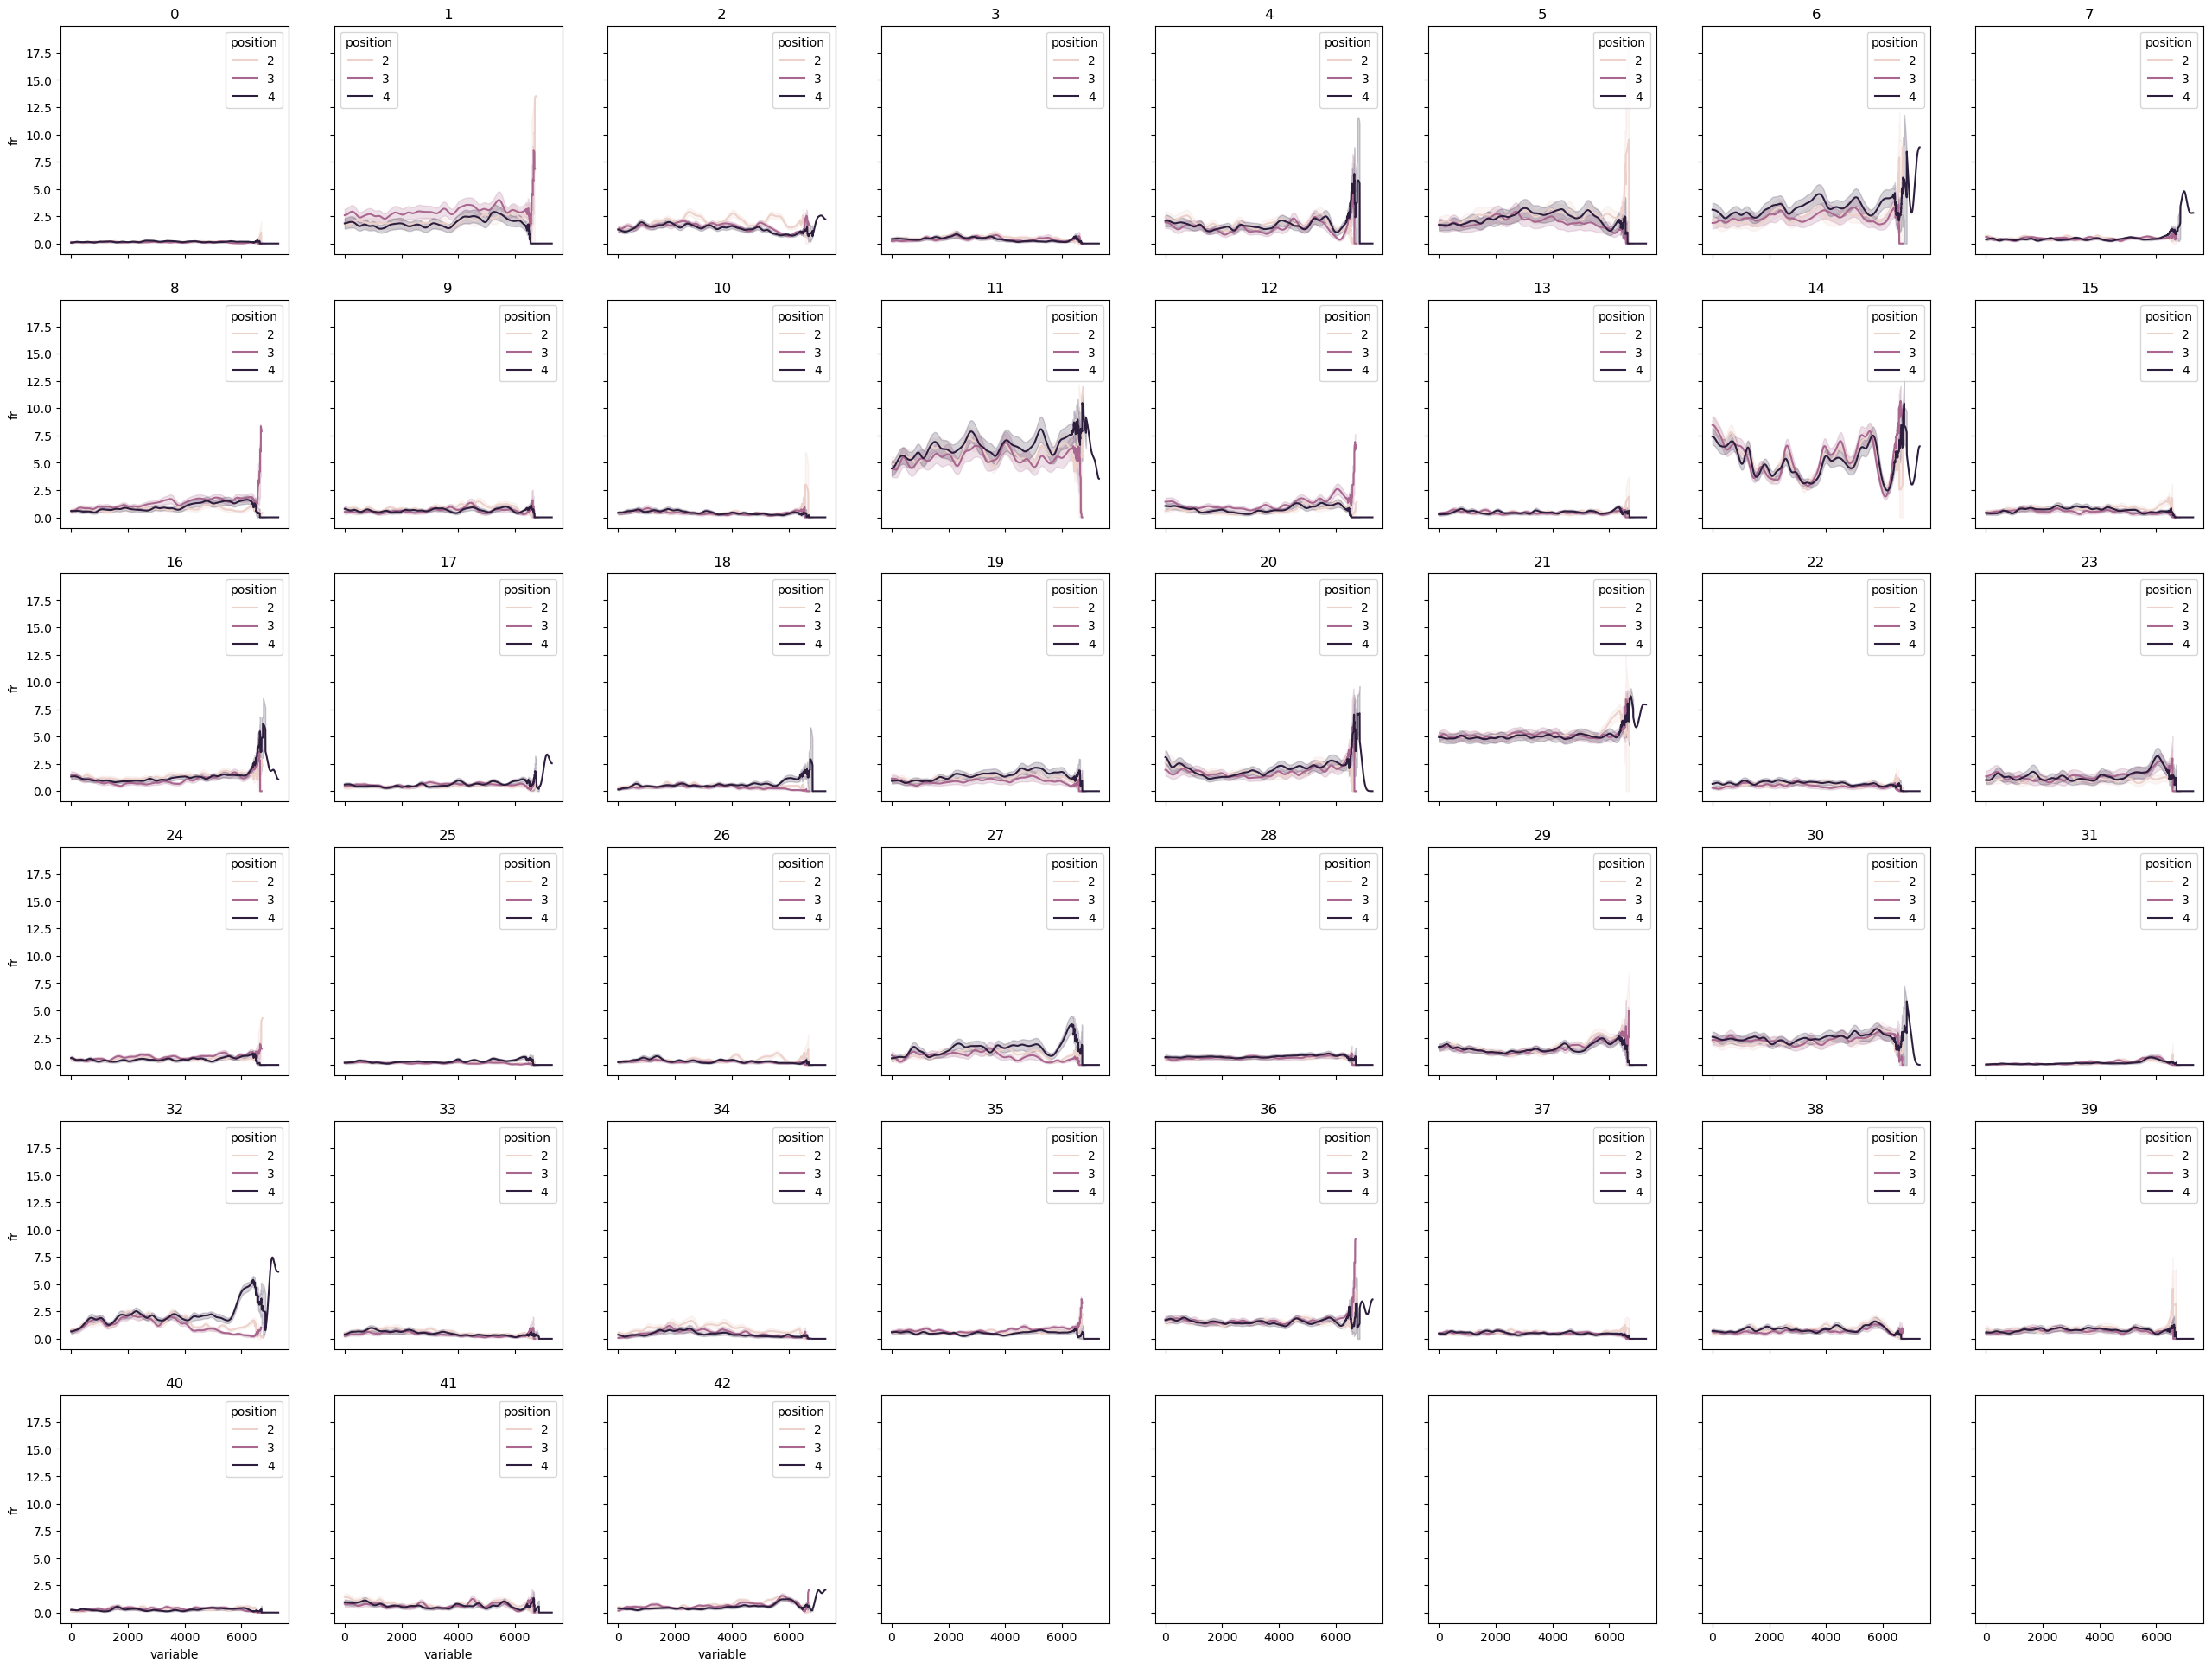

In [89]:
fig, axs = plt.subplots(6,8, figsize=(32,24), sharex=True, sharey=True)

axs = np.ravel(axs)

for n in range(n_neurons):
    print(f'### neuron {n}/{n_neurons} ###')
    plt.sca(axs[n])
    plt.title(n)
    df = pd.DataFrame(spike_convolved[:,:,n], index=target['position'])
    df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
    sns.lineplot(
        data=df_ex, 
        x='variable', 
        y='fr', 
        hue = 'position',
        errorbar='se'
    )

# Classify

## Trial type 

In [82]:
acc_tt = np.zeros((n_neurons, n_times))

for n in range(n_neurons) :
    print(f'### neuron {n}/{n_neurons} ###')
    X_n =  spike_convolved[:,:,n]
    acc_tt[n, :] = Parallel(n_jobs=-1)(delayed(classify)(X_n[:,t], target['trial_type']) for t in range(n_times))

### neuron 0/43 ###
### neuron 1/43 ###
### neuron 2/43 ###
### neuron 3/43 ###
### neuron 4/43 ###
### neuron 5/43 ###
### neuron 6/43 ###
### neuron 7/43 ###
### neuron 8/43 ###
### neuron 9/43 ###
### neuron 10/43 ###
### neuron 11/43 ###
### neuron 12/43 ###
### neuron 13/43 ###
### neuron 14/43 ###
### neuron 15/43 ###
### neuron 16/43 ###
### neuron 17/43 ###
### neuron 18/43 ###
### neuron 19/43 ###
### neuron 20/43 ###
### neuron 21/43 ###
### neuron 22/43 ###
### neuron 23/43 ###
### neuron 24/43 ###
### neuron 25/43 ###
### neuron 26/43 ###
### neuron 27/43 ###
### neuron 28/43 ###
### neuron 29/43 ###
### neuron 30/43 ###
### neuron 31/43 ###
### neuron 32/43 ###
### neuron 33/43 ###
### neuron 34/43 ###
### neuron 35/43 ###
### neuron 36/43 ###
### neuron 37/43 ###
### neuron 38/43 ###
### neuron 39/43 ###
### neuron 40/43 ###
### neuron 41/43 ###
### neuron 42/43 ###


In [92]:
lab_desktop = False
if lab_desktop : 
    result_path = '/home/INT/mifsud.l/Bureau/pattern_classification_git/results/'

else : 
    result_path = '/home/laurie/Bureau/pattern_classification_git/results/'

np.save(result_path + 'accuracy_trial_type.npy', acc_tt)

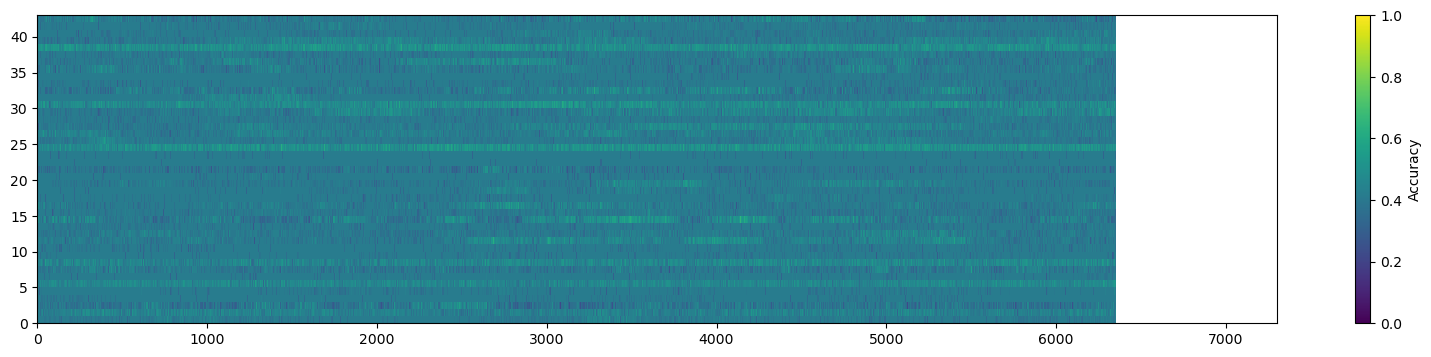

In [83]:
vmin = 0.0
vmax = 1.0

plt.figure(figsize=(20,4))
# Create the pcolormesh plot with specified vmin and vmax
mesh = plt.pcolormesh(acc_tt, vmin=vmin, vmax=vmax)

# Add the colorbar
cbar = plt.colorbar(mesh)

# Add a label to the colorbar
cbar.set_label('Accuracy')

plt.show()

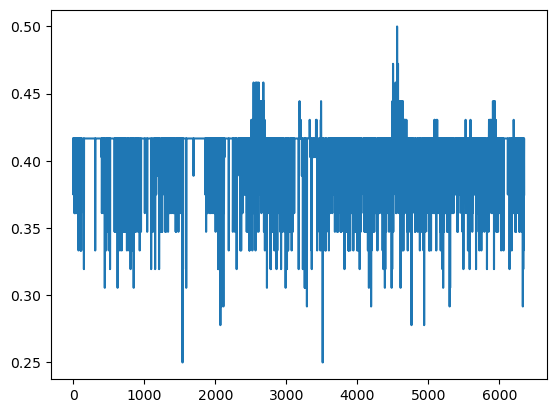

In [84]:
plt.plot(acc_tt[9,:])

In [85]:
reshaped_data = acc_tt.reshape(-1)
# Create index for neurons and times
neuron_index = np.repeat(np.arange(n_neurons), n_times)
time_index = np.tile(np.arange(n_times), n_neurons)

In [86]:
# Create DataFrame
acc_ = pd.DataFrame({
    'neuron': neuron_index,
    'time': time_index,
    'accuracy': reshaped_data
})

(0.0, 1.0)

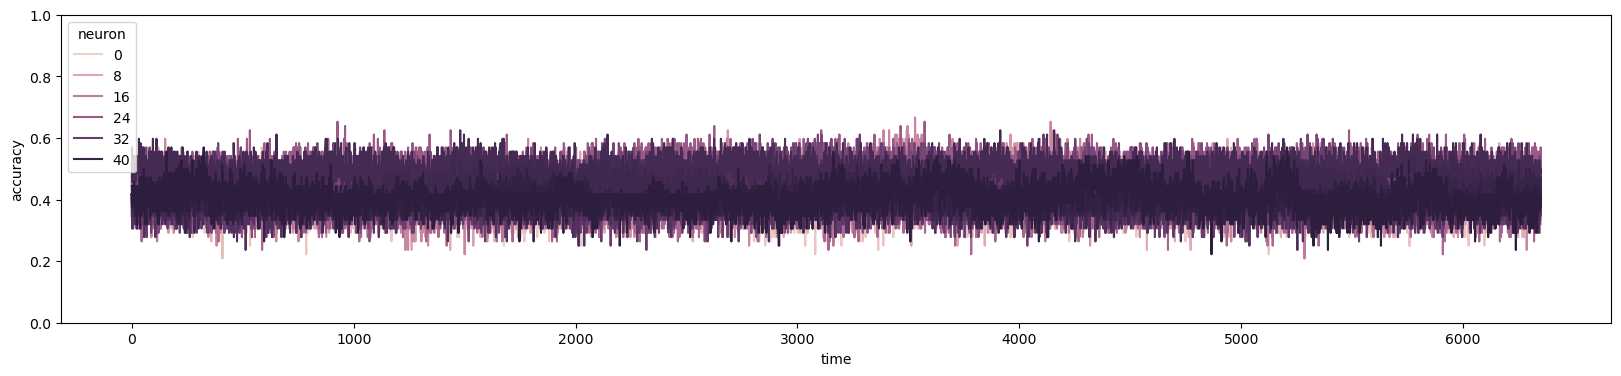

In [87]:
plt.figure(figsize=(20,4))
sns.lineplot(
        data=acc_, 
        x='time', 
        y='accuracy',
        hue='neuron',
        errorbar='se'
    )

plt.ylim(0, 1)

## position 

In [76]:
acc_pos = np.zeros((n_neurons, n_times))

for n in range(n_neurons) :
    print(f'### neuron {n}/{n_neurons} ###')
    X_n =  spike_convolved[:,:,n]
    acc_pos[n, :] = Parallel(n_jobs=-1)(delayed(classify)(X_n[:,t], target['position']) for t in range(n_times))

### neuron 0/43 ###
### neuron 1/43 ###
### neuron 2/43 ###
### neuron 3/43 ###
### neuron 4/43 ###
### neuron 5/43 ###
### neuron 6/43 ###
### neuron 7/43 ###
### neuron 8/43 ###
### neuron 9/43 ###
### neuron 10/43 ###
### neuron 11/43 ###
### neuron 12/43 ###
### neuron 13/43 ###
### neuron 14/43 ###
### neuron 15/43 ###
### neuron 16/43 ###
### neuron 17/43 ###
### neuron 18/43 ###
### neuron 19/43 ###
### neuron 20/43 ###
### neuron 21/43 ###
### neuron 22/43 ###
### neuron 23/43 ###
### neuron 24/43 ###
### neuron 25/43 ###
### neuron 26/43 ###
### neuron 27/43 ###
### neuron 28/43 ###
### neuron 29/43 ###
### neuron 30/43 ###
### neuron 31/43 ###
### neuron 32/43 ###
### neuron 33/43 ###
### neuron 34/43 ###
### neuron 35/43 ###
### neuron 36/43 ###
### neuron 37/43 ###
### neuron 38/43 ###
### neuron 39/43 ###
### neuron 40/43 ###
### neuron 41/43 ###
### neuron 42/43 ###


In [91]:
np.save(result_path + 'accuracy_position.npy', acc_pos)

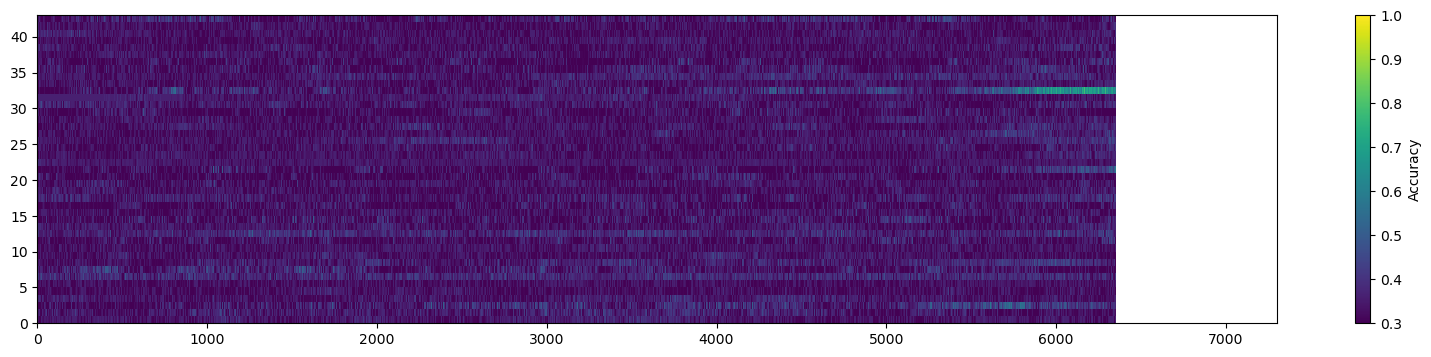

In [90]:
vmin = 0.3
vmax = 1.0

plt.figure(figsize=(20,4))
# Create the pcolormesh plot with specified vmin and vmax
mesh = plt.pcolormesh(acc_pos, vmin=vmin, vmax=vmax)

# Add the colorbar
cbar = plt.colorbar(mesh)

# Add a label to the colorbar
cbar.set_label('Accuracy')

plt.show()

In [78]:
reshaped_data = acc_pos.reshape(-1)
# Create index for neurons and times
neuron_index = np.repeat(np.arange(n_neurons), n_times)
time_index = np.tile(np.arange(n_times), n_neurons)

In [79]:
# Create DataFrame
acc = pd.DataFrame({
    'neuron': neuron_index,
    'time': time_index,
    'accuracy': reshaped_data
})

In [80]:
acc

,neuron,time,accuracy
0,0,0,0.347222
1,0,1,0.361111
2,0,2,0.361111
3,0,3,0.347222
4,0,4,0.361111
...,...,...,...
314067,42,7299,NaN
314068,42,7300,NaN
314069,42,7301,NaN
314070,42,7302,NaN


(0.0, 1.0)

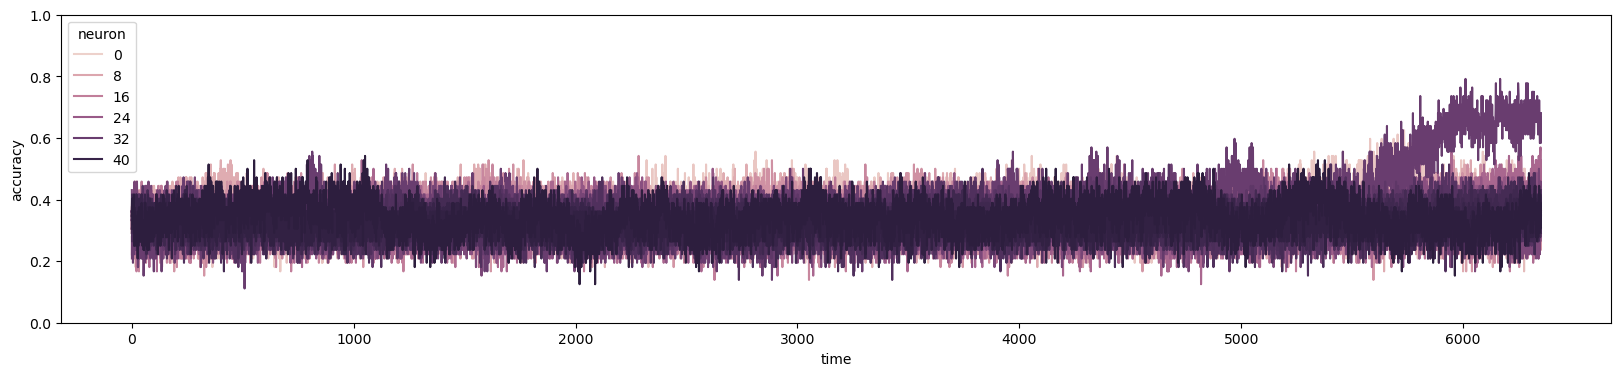

In [81]:
plt.figure(figsize=(20,4))
sns.lineplot(
        data=acc, 
        x='time', 
        y='accuracy',
        hue='neuron',
        errorbar='se'
    )

plt.ylim(0, 1)